In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [29]:
dataset = pd.read_csv('Datasets/feature_dataset.csv')

dataset = dataset.reset_index()

col_names = [ 
    "Home Team ELO", "Away Team ELO", "Home XG", "Away XG", 
    "Home XGA", "Away XGA", "Home Win Percentage", "Home Draw Percentage", 
    "Away Win Percentage", "Away Draw Percentage", "Head2Head Win", 
    "Head2Head Draw", "Winner"
]

dataset = dataset[col_names]
dataset.head()

,Home Team ELO,Away Team ELO,Home XG,Away XG,Home XGA,Away XGA,Home Win Percentage,Home Draw Percentage,Away Win Percentage,Away Draw Percentage,Head2Head Win,Head2Head Draw,Winner
0,1170,1041,54.21,33.84,40.90,55.94,64.50,20.64,29.82,28.95,0,0,-1
1,988,1016,38.63,37.45,53.75,51.46,24.01,26.97,26.52,25.10,0,0,0
2,763,1191,48.21,44.89,56.39,46.18,27.27,29.22,36.44,28.54,0,0,0
3,1002,1202,46.69,57.40,52.39,57.04,32.51,25.29,39.62,25.83,0,0,-1
4,865,926,45.73,65.26,32.79,46.99,30.42,24.58,21.05,26.32,0,0,-1


Accuracy: 0.5477239353891337

Feature Weights for Logistic Regression:
Home Team ELO: -0.0019057611997500622
Away Team ELO: 0.0017658266206003717
Home XG: -0.010714995486436443
Away XG: 0.009249110669244151
Home XGA: 0.01574782203872405
Away XGA: -0.012283258589931807
Home Win Percentage: -0.004418771327450616
Home Draw Percentage: 0.010116744901012931
Away Win Percentage: -0.005945793230400261
Away Draw Percentage: -0.006016017182749462
Head2Head Win: 0.00767007200220016
Head2Head Draw: -0.0014518534225572545


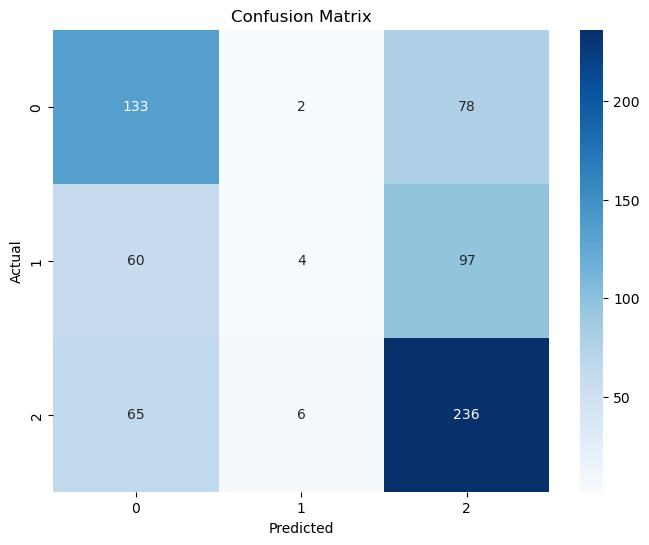

In [30]:
X = dataset.drop('Winner', axis=1)
y = dataset['Winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_regression_model = LogisticRegression(random_state=16, max_iter=10000, solver='saga')

logistic_regression_model.fit(X_train, y_train)

y_pred = logistic_regression_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

feature_weights = logistic_regression_model.coef_[0]
features = X.columns


print("\nFeature Weights for Logistic Regression:")
for feature, weight in zip(features, feature_weights):
    print(f"{feature}: {weight}")


from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

SVM Accuracy: 0.5491923641703378

Feature Weights for SVM (Linear Kernel):
Home Team ELO: -0.001112360068864247
Away Team ELO: 0.0009462230468569734
Home XG: -0.006037121730912422
Away XG: 0.0049387661973077325
Home XGA: 0.009171648982676412
Away XGA: -0.008930494612017014
Home Win Percentage: -0.0023647316269095196
Home Draw Percentage: 0.002091176800928402
Away Win Percentage: -0.0031718127679845136
Away Draw Percentage: -0.004238687636859297
Head2Head Win: 0.004015314172736621
Head2Head Draw: -0.0011033684679634388


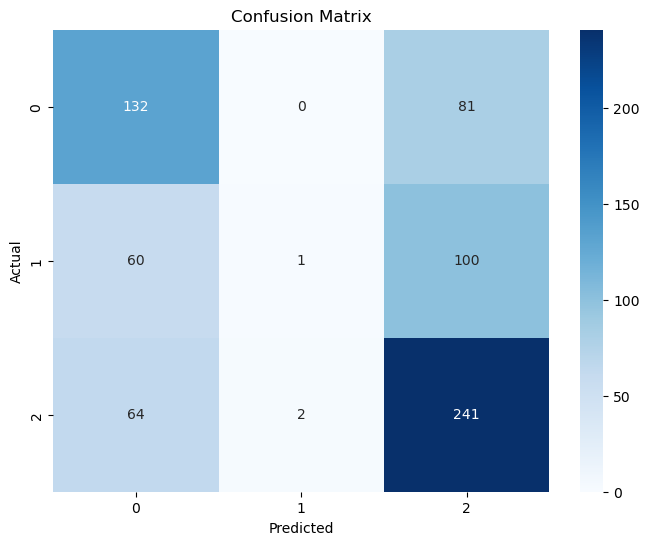

In [31]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Linear SVM model
svm_model = LinearSVC(random_state=16, max_iter=10000)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print('SVM Accuracy:', accuracy_svm)

# Get feature weights from Linear SVM
feature_weights = svm_model.coef_[0]
features = X.columns

print("\nFeature Weights for SVM (Linear Kernel):")
for feature, weight in zip(features, feature_weights):
    print(f"{feature}: {weight}")

# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Decision Tree Accuracy: 0.5873715124816447

Feature Importances:
                 Feature  Importance
8    Away Win Percentage    0.162613
3                Away XG    0.125890
4               Home XGA    0.118752
0          Home Team ELO    0.108287
2                Home XG    0.089670
1          Away Team ELO    0.077592
6    Home Win Percentage    0.074374
5               Away XGA    0.061872
7   Home Draw Percentage    0.057791
9   Away Draw Percentage    0.057383
10         Head2Head Win    0.038795
11        Head2Head Draw    0.026980


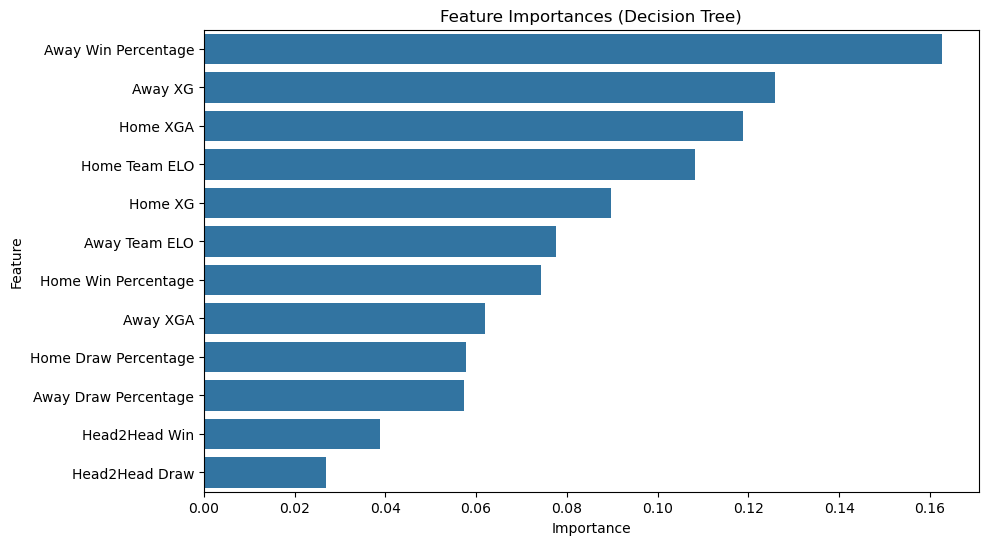

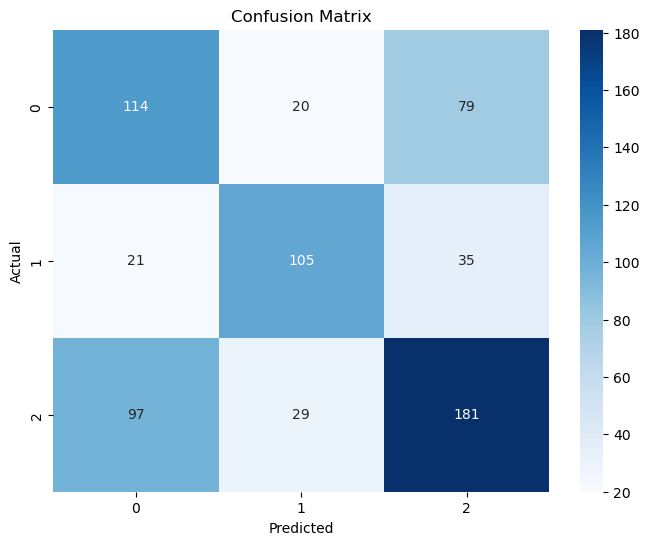

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=16)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print('Decision Tree Accuracy:', accuracy_dt)

# Get feature importances
feature_importances = decision_tree_model.feature_importances_
features = X.columns

# Display feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df)

# Plot the top most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances (Decision Tree)')
plt.show()

# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Random Forest Accuracy: 0.6945668135095447

Random Forest Feature Importances:
                 Feature  Importance
4               Home XGA    0.134510
3                Away XG    0.133873
0          Home Team ELO    0.109991
1          Away Team ELO    0.103124
8    Away Win Percentage    0.086396
2                Home XG    0.078128
5               Away XGA    0.077072
6    Home Win Percentage    0.076467
9   Away Draw Percentage    0.064888
7   Home Draw Percentage    0.062786
10         Head2Head Win    0.038571
11        Head2Head Draw    0.034195


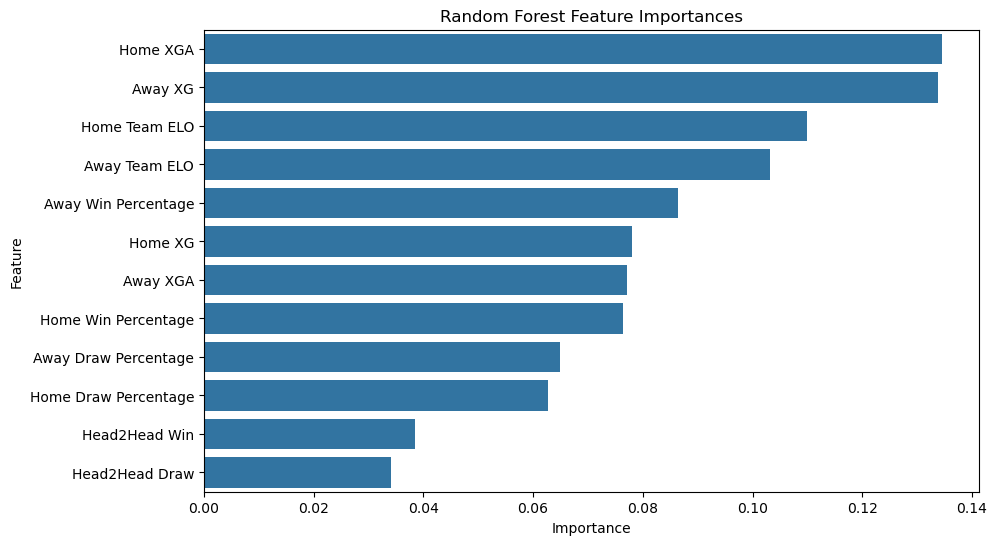

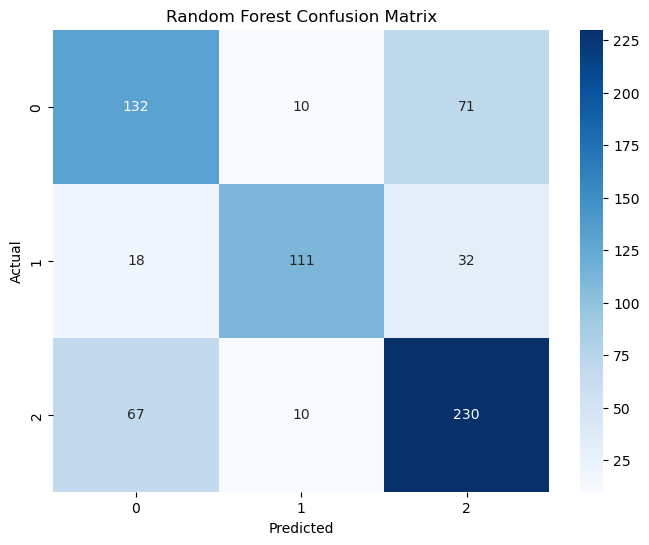

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=16, n_estimators=1000)

# Train the model
random_forest_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Random Forest Accuracy:', accuracy_rf)

# Get feature importances
feature_importances_rf = random_forest_model.feature_importances_
features = X.columns

# Display feature importances
importance_df_rf = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances_rf
}).sort_values(by='Importance', ascending=False)

print("\nRandom Forest Feature Importances:")
print(importance_df_rf)

# Plot the top most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_rf)
plt.title('Random Forest Feature Importances')
plt.show()

# Confusion matrix for Random Forest
cnf_matrix_rf = metrics.confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()